In [1]:
#Importing required modules
import numpy as np
import datetime as dt
import astropy.units as u
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from galpy.potential import MWPotential2014
from galpy.actionAngle import actionAngleAdiabatic
from galpy.df import quasiisothermaldf
from galpy.actionAngle import actionAngleStaeckel

#Setting up the action angle and qdf with MWPotential2014
aAS= actionAngleStaeckel(pot=MWPotential2014,delta=0.45,c=True)
qdfS= quasiisothermaldf(1./3.,0.2,0.1,1.,1.,pot=MWPotential2014,aA=aAS,cutcounter=True)

c:\users\ayush\anaconda3\lib\site-packages\astropy\coordinates\sky_coordinate.py:1786: AstropyDeprecationWarning: Passing a frame as a positional argument is now deprecated, use the frame= keyword argument instead.
  "instead.", AstropyDeprecationWarning)



c:\users\ayush\anaconda3\lib\site-packages\galpy\df_src\quasiisothermaldf.py:266: RuntimeWarning: divide by zero encountered in log
  -kappa*jr*numpy.exp(-2.*lnsr)

c:\users\ayush\anaconda3\lib\site-packages\scipy\optimize\optimize.py:2581: RuntimeWarning: overflow encountered in double_scalars
  bnd = ftol * (numpy.abs(fx) + numpy.abs(fval)) + 1e-20

Optimization terminated successfully.
         Current function value: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.000000
         Iterations: 1
         Function evaluations: 13
Optimization terminated successfully.
         Current function value: -6.404609
         Iterations: 1
         Function evaluations: 13
Optimization terminated successfully.
         Current function

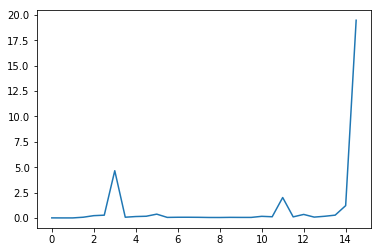

In [2]:
#Test 1: Timing sampleV using natural units with increasing radius

#Setting up distances from 0 to 15 natural units with 0.5 intervals
distances =  np.arange(0., 15., 0.5)

#Setting up an empty list to store times
times = []

#Using a loop to check computation time for different distances with sampleV
for i in range(len(distances)):
    start = timer()
    vs = qdfS.sampleV(distances[i],0.,n=1)
    end = timer()
    difference = end - start
    times.append(difference)

#Printing an array of all computation times
times

#Plot computation times
plt.plot(distances, times)

c:\users\ayush\anaconda3\lib\site-packages\galpy\df_src\quasiisothermaldf.py:266: RuntimeWarning: divide by zero encountered in log
  -kappa*jr*numpy.exp(-2.*lnsr)

c:\users\ayush\anaconda3\lib\site-packages\scipy\optimize\optimize.py:2581: RuntimeWarning: overflow encountered in double_scalars
  bnd = ftol * (numpy.abs(fx) + numpy.abs(fval)) + 1e-20

Optimization terminated successfully.
         Current function value: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.000000
         Iterations: 1
         Function evaluations: 13
Optimization terminated successfully.
         Current function value: -6.355686
         Iterations: 2
         Function evaluations: 27
Optimization terminated successfully.
         Current function

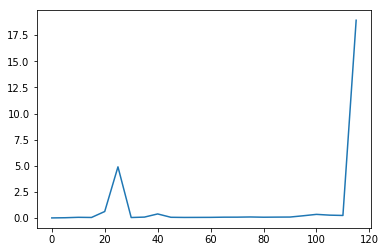

In [8]:
#Test 2: Timing sampleV using astropy kpc units with increasing radius

#Setting up distances from 0 to 120 kpc with 5 kpc intervals
distances_kpc =  np.arange(0., 120., 5)*u.kpc

#Setting up an empty list to store times
times_kpc = []

#Using a loop to check computation time for different distances with sampleV
for i in range(len(distances_kpc)):
    start = timer()
    vs_kpc = qdfS.sampleV(distances_kpc[i],0.,n=1)
    end = timer()
    difference = end - start
    times_kpc.append(difference)

#Printing an array of all computation times
times_kpc

#Plotting computation times
plt.plot(distances_kpc, times_kpc)

c:\users\ayush\anaconda3\lib\site-packages\galpy\df_src\quasiisothermaldf.py:266: RuntimeWarning: divide by zero encountered in log
  -kappa*jr*numpy.exp(-2.*lnsr)

Optimization terminated successfully.
         Current function value: 334.148133
         Iterations: 3
         Function evaluations: 60
Optimization terminated successfully.
         Current function value: 312.242899
         Iterations: 3
         Function evaluations: 61
Optimization terminated successfully.
         Current function value: 290.102540
         Iterations: 3
         Function evaluations: 63
Optimization terminated successfully.
         Current function value: 267.719019
         Iterations: 3
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: 245.078871
         Iterations: 3
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 222.158231
         Iterations: 3
         Function evaluations: 58
O

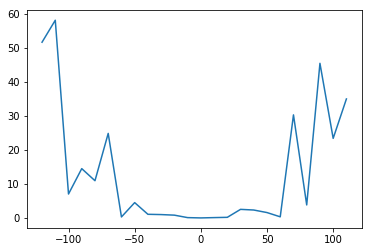

In [16]:
#Test 3: Timing sampleV using astropy kpc units with increasing/decreasing height

#Setting up heights from -120 to 120 kpc with 10 kpc intervals
heights_kpc =  np.arange(-120., 120., 10)*u.kpc

#Setting up an empty list to store times
times_hkpc = []

#Using a loop to check computation time for different heights with sampleV
for i in range(len(heights_kpc)):
    start = timer()
    vs_hkpc = qdfS.sampleV(8.*u.kpc,heights_kpc[i],n=1)
    end = timer()
    difference = end - start
    times_hkpc.append(difference)

#Printing an array of all computation times
times_hkpc

#Plotting computation times
plt.plot(heights_kpc, times_hkpc)

In [17]:
#Test 4: Timing sampleV for 10,000 stars within a 1 kpc sphere of the Sun

#Setting up distances within 1 kpc of the Sun
R = distances_kpc =  np.arange(7., 9., 0.02)*u.kpc
z =  np.arange(-1., 1., 0.02)*u.kpc

#Using a loop to time the total computation time for 10,000 objects
start = timer()
for i in range(len(R)):
    for j in range(len(z)):
        s = qdfS.sampleV(R[i], z[j], n=1)
end = timer()
difference = end - start

#Printing the total computation time in h/m/s
objects = len(R)*len(z)
time = str(dt.timedelta(seconds=difference))
hours, minutes, seconds = time.split(':')
print('Computation time for ' + str(objects) + ' stars:', str(hours) + 'h', str(minutes) + 'm', str(seconds) + 's')

c:\users\ayush\anaconda3\lib\site-packages\galpy\df_src\quasiisothermaldf.py:266: RuntimeWarning: divide by zero encountered in log
  -kappa*jr*numpy.exp(-2.*lnsr)

Optimization terminated successfully.
         Current function value: -2.437856
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -2.558814
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -2.678600
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -2.797191
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -2.914564
         Iterations: 2
         Function evaluations: 35
Optimization terminated successfully.
         Current function value: -3.030693
         Iterations: 2
         Function evaluations: 39
Optimiz

Optimization terminated successfully.
         Current function value: -5.775473
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -5.713799
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -5.649409
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -5.582412
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -5.512907
         Iterations: 2
         Function evaluations: 35
Optimization terminated successfully.
         Current function value: -5.440985
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -5.366731
         Iterations: 2
         Function evaluations: 44
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -5.212845
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -5.291389
         Iterations: 2
         Function evaluations: 47
Optimization terminated successfully.
         Current function value: -5.367755
         Iterations: 2
         Function evaluations: 43
Optimization terminated successfully.
         Current function value: -5.441871
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -5.513660
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -5.583037
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -5.649910
         Iterations: 2
         Function evaluations: 38
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -3.596091
         Iterations: 2
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -3.486766
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -3.376070
         Iterations: 2
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: -3.264030
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -3.150673
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -3.036025
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -2.920113
         Iterations: 2
         Function evaluations: 36
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -6.261849
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -6.249518
         Iterations: 1
         Function evaluations: 15
Optimization terminated successfully.
         Current function value: -6.232403
         Iterations: 1
         Function evaluations: 15
Optimization terminated successfully.
         Current function value: -6.210640
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.184390
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.153829
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.119145
         Iterations: 1
         Function evaluations: 14
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -4.127666
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -4.227768
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -4.326285
         Iterations: 2
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: -4.423182
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -4.518419
         Iterations: 2
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: -4.611959
         Iterations: 2
         Function evaluations: 43
Optimization terminated successfully.
         Current function value: -4.703759
         Iterations: 2
         Function evaluations: 48
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -5.052661
         Iterations: 2
         Function evaluations: 47
Optimization terminated successfully.
         Current function value: -4.968277
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -4.881965
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -4.793777
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -4.703759
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -4.611959
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -4.518419
         Iterations: 2
         Function evaluations: 39
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -5.834916
         Iterations: 2
         Function evaluations: 43
Optimization terminated successfully.
         Current function value: -5.890382
         Iterations: 1
         Function evaluations: 13
Optimization terminated successfully.
         Current function value: -5.942769
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -5.991929
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.037700
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.079915
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.118393
         Iterations: 1
         Function evaluations: 14
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -2.583336
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -2.469488
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -2.589327
         Iterations: 2
         Function evaluations: 47
Optimization terminated successfully.
         Current function value: -2.708008
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -2.825507
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -2.941800
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -3.056865
         Iterations: 2
         Function evaluations: 46
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -6.079611
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.037474
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -5.991785
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -5.942715
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -5.890423
         Iterations: 1
         Function evaluations: 13
Optimization terminated successfully.
         Current function value: -5.835058
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -5.776757
         Iterations: 2
         Function evaluations: 37
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -4.618950
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -4.710260
         Iterations: 2
         Function evaluations: 43
Optimization terminated successfully.
         Current function value: -4.799796
         Iterations: 2
         Function evaluations: 49
Optimization terminated successfully.
         Current function value: -4.887513
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -4.973363
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -5.057296
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -5.139255
         Iterations: 2
         Function evaluations: 40
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -4.334805
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -4.236814
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -4.137248
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -4.036141
         Iterations: 2
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: -3.933525
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -3.829433
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -3.723896
         Iterations: 2
         Function evaluations: 37
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -6.229497
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.246455
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.258673
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.266047
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.268512
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.266047
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.258673
         Iterations: 1
         Function evaluations: 14
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -3.407749
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -3.517055
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -3.625010
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -3.731584
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -3.836749
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -3.940474
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -4.042729
         Iterations: 2
         Function evaluations: 40
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -5.518683
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -5.447792
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -5.374602
         Iterations: 2
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -5.299189
         Iterations: 2
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: -5.221625
         Iterations: 2
         Function evaluations: 43
Optimization terminated successfully.
         Current function value: -5.141976
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -5.060304
         Iterations: 2
         Function evaluations: 42
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -5.448599
         Iterations: 2
         Function evaluations: 43
Optimization terminated successfully.
         Current function value: -5.519365
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -5.587753
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -5.653672
         Iterations: 2
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: -5.717023
         Iterations: 2
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: -5.777701
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -5.835589
         Iterations: 2
         Function evaluations: 42
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -3.521219
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -3.412105
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -3.301668
         Iterations: 2
         Function evaluations: 47
Optimization terminated successfully.
         Current function value: -3.189937
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -3.076936
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -2.962692
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -2.847229
         Iterations: 2
         Function evaluations: 40
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -6.244657
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.227790
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.206341
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.180470
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.150350
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.116164
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.078099
         Iterations: 1
         Function evaluations: 14
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -4.052372
         Iterations: 2
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: -4.152604
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -4.251308
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -4.348450
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -4.443995
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -4.537904
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -4.630139
         Iterations: 2
         Function evaluations: 40
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -5.145947
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -5.064697
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -4.981490
         Iterations: 2
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: -4.896382
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -4.809422
         Iterations: 2
         Function evaluations: 55
Optimization terminated successfully.
         Current function value: -4.720660
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -4.630139
         Iterations: 2
         Function evaluations: 48
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -5.718000
         Iterations: 2
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: -5.778364
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -5.835952
         Iterations: 2
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -5.890638
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -5.942288
         Iterations: 1
         Function evaluations: 13
Optimization terminated successfully.
         Current function value: -5.990755
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.035880
         Iterations: 1
         Function evaluations: 14
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -2.862991
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -2.746946
         Iterations: 2
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: -2.629738
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -2.517154
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -2.635297
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -2.752302
         Iterations: 2
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: -2.868146
         Iterations: 2
         Function evaluations: 44
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -6.077198
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.035652
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -5.990604
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -5.942221
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -5.890659
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -5.836066
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -5.778576
         Iterations: 2
         Function evaluations: 37
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -4.636583
         Iterations: 2
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: -4.726647
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -4.814962
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -4.901483
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -4.986162
         Iterations: 2
         Function evaluations: 57
Optimization terminated successfully.
         Current function value: -5.068949
         Iterations: 2
         Function evaluations: 49
Optimization terminated successfully.
         Current function value: -5.149790
         Iterations: 2
         Function evaluations: 46
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -4.636583
         Iterations: 2
         Function evaluations: 53
Optimization terminated successfully.
         Current function value: -4.544812
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -4.451377
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -4.356314
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -4.259663
         Iterations: 2
         Function evaluations: 47
Optimization terminated successfully.
         Current function value: -4.161457
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -4.061733
         Iterations: 2
         Function evaluations: 39
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -6.035197
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.076601
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.114340
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.148232
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.178093
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.203741
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.225005
         Iterations: 1
         Function evaluations: 14
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -2.534124
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -2.651660
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -2.768065
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -2.883318
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -2.997395
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -3.110270
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -3.221921
         Iterations: 2
         Function evaluations: 37
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -5.779190
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -5.719231
         Iterations: 2
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: -5.656630
         Iterations: 2
         Function evaluations: 35
Optimization terminated successfully.
         Current function value: -5.591490
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -5.523910
         Iterations: 2
         Function evaluations: 35
Optimization terminated successfully.
         Current function value: -5.453977
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -5.381775
         Iterations: 2
         Function evaluations: 42
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -5.231956
         Iterations: 2
         Function evaluations: 43
Optimization terminated successfully.
         Current function value: -5.308350
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -5.382625
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -5.454709
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -5.524527
         Iterations: 2
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: -5.591996
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -5.657028
         Iterations: 2
         Function evaluations: 36
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -3.970108
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -3.867953
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -3.764382
         Iterations: 2
         Function evaluations: 47
Optimization terminated successfully.
         Current function value: -3.659426
         Iterations: 2
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: -3.553114
         Iterations: 2
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: -3.445473
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -3.336531
         Iterations: 2
         Function evaluations: 39
Optimization terminated successful

         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.223371
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.202214
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.176695
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.146984
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.113262
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.075712
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.034514
         Iterations: 1
         Function evaluations: 14


Optimization terminated successfully.
         Current function value: -4.273035
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -4.368899
         Iterations: 2
         Function evaluations: 49
Optimization terminated successfully.
         Current function value: -4.463187
         Iterations: 2
         Function evaluations: 53
Optimization terminated successfully.
         Current function value: -4.555862
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -4.646886
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -4.736218
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -4.823814
         Iterations: 2
         Function evaluations: 44
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -4.823814
         Iterations: 2
         Function evaluations: 43
Optimization terminated successfully.
         Current function value: -4.736218
         Iterations: 2
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: -4.646886
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -4.555862
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -4.463187
         Iterations: 2
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: -4.368899
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -4.273035
         Iterations: 2
         Function evaluations: 42
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -6.201210
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.222297
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.238880
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.250827
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.258037
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.260448
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.258037
         Iterations: 1
         Function evaluations: 14
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -3.132733
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -3.243469
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -3.352966
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -3.461200
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -3.568143
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -3.673767
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -3.778045
         Iterations: 2
         Function evaluations: 39
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -5.720661
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -5.658566
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -5.593952
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -5.526916
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -5.457547
         Iterations: 2
         Function evaluations: 35
Optimization terminated successfully.
         Current function value: -5.385925
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -5.312127
         Iterations: 2
         Function evaluations: 63
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -5.237258
         Iterations: 2
         Function evaluations: 47
Optimization terminated successfully.
         Current function value: -5.313044
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -5.386726
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -5.458235
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -5.527495
         Iterations: 2
         Function evaluations: 43
Optimization terminated successfully.
         Current function value: -5.594425
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -5.658936
         Iterations: 2
         Function evaluations: 36
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -3.884116
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -3.781376
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -3.677263
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -3.571807
         Iterations: 2
         Function evaluations: 49
Optimization terminated successfully.
         Current function value: -3.465035
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -3.356974
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -3.247652
         Iterations: 2
         Function evaluations: 47
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -6.249102
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.237213
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.220710
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.199725
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.174413
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.144942
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.111493
         Iterations: 1
         Function evaluations: 14
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -4.090968
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -4.189100
         Iterations: 2
         Function evaluations: 47
Optimization terminated successfully.
         Current function value: -4.285739
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -4.380851
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -4.474400
         Iterations: 2
         Function evaluations: 69
Optimization terminated successfully.
         Current function value: -4.566350
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -4.656662
         Iterations: 2
         Function evaluations: 38
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -5.082157
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -5.000686
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -4.917352
         Iterations: 2
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -4.832206
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -4.745294
         Iterations: 2
         Function evaluations: 43
Optimization terminated successfully.
         Current function value: -4.656662
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -4.566350
         Iterations: 2
         Function evaluations: 51
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -5.780824
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -5.837205
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -5.890744
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -5.941308
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -5.988754
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -6.032927
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.073665
         Iterations: 1
         Function evaluations: 14
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -3.038683
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -2.926268
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -2.812699
         Iterations: 2
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: -2.697998
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -2.587275
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -2.702899
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -2.817418
         Iterations: 2
         Function evaluations: 36
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -6.032702
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -5.988597
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -5.941224
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -5.890738
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -5.837282
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -5.780987
         Iterations: 2
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: -5.721977
         Iterations: 2
         Function evaluations: 41
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -4.921786
         Iterations: 2
         Function evaluations: 55
Optimization terminated successfully.
         Current function value: -5.004741
         Iterations: 2
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: -5.085841
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -5.165034
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -5.242263
         Iterations: 2
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: -5.317469
         Iterations: 2
         Function evaluations: 49
Optimization terminated successfully.
         Current function value: -5.390587
         Iterations: 2
         Function evaluations: 47
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -4.387728
         Iterations: 2
         Function evaluations: 49
Optimization terminated successfully.
         Current function value: -4.293050
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -4.196853
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -4.099170
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -4.000034
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -3.899477
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -3.797530
         Iterations: 2
         Function evaluations: 39
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -6.172192
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.197308
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.218130
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.234503
         Iterations: 1
         Function evaluations: 15
Optimization terminated successfully.
         Current function value: -6.246300
         Iterations: 1
         Function evaluations: 15
Optimization terminated successfully.
         Current function value: -6.253419
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.255799
         Iterations: 1
         Function evaluations: 14
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -3.383927
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -3.490821
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -3.596443
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -3.700766
         Iterations: 2
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: -3.803762
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -3.905403
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -4.005658
         Iterations: 2
         Function evaluations: 38
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -5.661380
         Iterations: 2
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: -5.597557
         Iterations: 2
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: -5.531340
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -5.462817
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -5.392067
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -5.319167
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -5.244185
         Iterations: 2
         Function evaluations: 41
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -5.320001
         Iterations: 2
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: -5.392794
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -5.463439
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -5.531861
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -5.597980
         Iterations: 2
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: -5.661709
         Iterations: 2
         Function evaluations: 34
Optimization terminated successfully.
         Current function value: -5.722953
         Iterations: 2
         Function evaluations: 35
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -3.908320
         Iterations: 2
         Function evaluations: 47
Optimization terminated successfully.
         Current function value: -3.806830
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -3.703987
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -3.599820
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -3.494356
         Iterations: 2
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: -3.387623
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -3.279648
         Iterations: 2
         Function evaluations: 47
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -6.254119
         Iterations: 1
         Function evaluations: 15
Optimization terminated successfully.
         Current function value: -6.251749
         Iterations: 1
         Function evaluations: 15
Optimization terminated successfully.
         Current function value: -6.244662
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.232920
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.216620
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.195893
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.170891
         Iterations: 1
         Function evaluations: 14
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -3.914062
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -4.013875
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -4.112279
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -4.209242
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -4.304732
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -4.398714
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -4.491152
         Iterations: 2
         Function evaluations: 41
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -5.170322
         Iterations: 2
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: -5.091709
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -5.011203
         Iterations: 2
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: -4.928856
         Iterations: 2
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: -4.844718
         Iterations: 2
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: -4.758836
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -4.671253
         Iterations: 2
         Function evaluations: 48
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -5.890653
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -5.940614
         Iterations: 2
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: -5.987492
         Iterations: 2
         Function evaluations: 47
Optimization terminated successfully.
         Current function value: -6.031137
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -6.071386
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.108070
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.141013
         Iterations: 1
         Function evaluations: 14
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -2.626171
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -2.740385
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -2.853512
         Iterations: 2
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: -2.965531
         Iterations: 2
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: -3.076417
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -3.186145
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -3.294692
         Iterations: 2
         Function evaluations: 40
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -6.030916
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -5.987334
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -5.940523
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -5.890635
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -5.837810
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -5.782179
         Iterations: 2
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: -5.723864
         Iterations: 2
         Function evaluations: 37
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -4.763615
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -4.849132
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -4.932912
         Iterations: 2
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: -5.014909
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -5.095072
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -5.173350
         Iterations: 2
         Function evaluations: 43
Optimization terminated successfully.
         Current function value: -5.249687
         Iterations: 2
         Function evaluations: 43
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -4.587543
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -4.497071
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -4.405027
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -4.311446
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -4.216365
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -4.119817
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -4.021836
         Iterations: 2
         Function evaluations: 37
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -6.139876
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.168773
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.193593
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.214169
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.230350
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.242007
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.249042
         Iterations: 1
         Function evaluations: 14
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -3.197492
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -3.305570
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -3.412448
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -3.518100
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -3.622498
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -3.725616
         Iterations: 2
         Function evaluations: 43
Optimization terminated successfully.
         Current function value: -3.827425
         Iterations: 2
         Function evaluations: 37
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -5.663874
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -5.600781
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -5.535320
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -5.467578
         Iterations: 2
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: -5.397635
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -5.325565
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -5.251435
         Iterations: 2
         Function evaluations: 39
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -5.252294
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -5.326321
         Iterations: 2
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: -5.398293
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -5.468139
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -5.535788
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -5.601158
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -5.664165
         Iterations: 2
         Function evaluations: 37
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -4.029544
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -3.930577
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -3.830244
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -3.728577
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -3.625603
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -3.521351
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -3.415848
         Iterations: 2
         Function evaluations: 38
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -6.240458
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.228850
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.212738
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.192250
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.167534
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.138759
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.106097
         Iterations: 2
         Function evaluations: 43
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -4.034545
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -4.131851
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -4.227733
         Iterations: 2
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: -4.322161
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -4.415099
         Iterations: 2
         Function evaluations: 43
Optimization terminated successfully.
         Current function value: -4.506512
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -4.596364
         Iterations: 2
         Function evaluations: 42
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -5.253980
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -5.178165
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -5.100422
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -5.020807
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -4.939371
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -4.856163
         Iterations: 2
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: -4.771231
         Iterations: 2
         Function evaluations: 41
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -5.665010
         Iterations: 2
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: -5.725311
         Iterations: 2
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: -5.783063
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -5.838155
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -5.890468
         Iterations: 2
         Function evaluations: 53
Optimization terminated successfully.
         Current function value: -5.939872
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -5.986227
         Iterations: 2
         Function evaluations: 43
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -3.319548
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -3.212073
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -3.103431
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -2.993648
         Iterations: 2
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: -2.882747
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -2.770754
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -2.662007
         Iterations: 2
         Function evaluations: 38
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -6.105134
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -6.068912
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -6.029168
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -5.986070
         Iterations: 2
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: -5.939777
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -5.890439
         Iterations: 2
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: -5.838197
         Iterations: 2
         Function evaluations: 43
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -4.511929
         Iterations: 2
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: -4.601424
         Iterations: 2
         Function evaluations: 49
Optimization terminated successfully.
         Current function value: -4.689327
         Iterations: 2
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: -4.775597
         Iterations: 2
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: -4.860193
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -4.943071
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -5.024184
         Iterations: 2
         Function evaluations: 38
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -4.775597
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -4.689327
         Iterations: 2
         Function evaluations: 47
Optimization terminated successfully.
         Current function value: -4.601424
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -4.511929
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -4.420879
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -4.328311
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -4.234260
         Iterations: 2
         Function evaluations: 47
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -6.104502
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -6.136943
         Iterations: 2
         Function evaluations: 29
Optimization terminated successfully.
         Current function value: -6.165523
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.190071
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.210420
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.226422
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -6.237951
         Iterations: 1
         Function evaluations: 14
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -3.226041
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -3.332937
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -3.438650
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -3.543154
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -3.646422
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -3.748427
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -3.849140
         Iterations: 2
         Function evaluations: 39
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -5.666076
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -5.603655
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -5.538891
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -5.471869
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -5.402669
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -5.331363
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -5.258019
         Iterations: 2
         Function evaluations: 40
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -5.403262
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -5.472374
         Iterations: 2
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: -5.539310
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -5.603991
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -5.666332
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -5.726239
         Iterations: 2
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: -5.783613
         Iterations: 2
         Function evaluations: 36
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -3.649268
         Iterations: 2
         Function evaluations: 55
Optimization terminated successfully.
         Current function value: -3.546135
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -3.441768
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -3.336194
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -3.229439
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -3.121529
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -3.012488
         Iterations: 2
         Function evaluations: 44
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -6.164349
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -6.135881
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -6.103568
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -6.067583
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -6.028100
         Iterations: 2
         Function evaluations: 43
Optimization terminated successfully.
         Current function value: -5.985284
         Iterations: 2
         Function evaluations: 43
Optimization terminated successfully.
         Current function value: -5.939294
         Iterations: 2
         Function evaluations: 45
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -4.430086
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -4.520556
         Iterations: 2
         Function evaluations: 47
Optimization terminated successfully.
         Current function value: -4.609481
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -4.696824
         Iterations: 2
         Function evaluations: 47
Optimization terminated successfully.
         Current function value: -4.782546
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -4.866604
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -4.948955
         Iterations: 2
         Function evaluations: 42
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -4.782546
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -4.696824
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -4.609481
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -4.520556
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -4.430086
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -4.338110
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -4.244661
         Iterations: 2
         Function evaluations: 38
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -5.984972
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -6.027679
         Iterations: 2
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: -6.067062
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -6.102954
         Iterations: 2
         Function evaluations: 76
Optimization terminated successfully.
         Current function value: -6.135185
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -6.163581
         Iterations: 2
         Function evaluations: 43
Optimization terminated successfully.
         Current function value: -6.187968
         Iterations: 2
         Function evaluations: 69
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -2.802808
         Iterations: 2
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: -2.694926
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -2.806622
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -2.917267
         Iterations: 2
         Function evaluations: 35
Optimization terminated successfully.
         Current function value: -3.026839
         Iterations: 2
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: -3.135312
         Iterations: 2
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: -3.242663
         Iterations: 2
         Function evaluations: 37
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -6.066803
         Iterations: 2
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: -6.027470
         Iterations: 2
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: -5.984817
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -5.939001
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -5.890171
         Iterations: 2
         Function evaluations: 53
Optimization terminated successfully.
         Current function value: -5.838464
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -5.784009
         Iterations: 2
         Function evaluations: 41
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -4.614095
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -4.701117
         Iterations: 2
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: -4.786523
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -4.870272
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -4.952321
         Iterations: 2
         Function evaluations: 47
Optimization terminated successfully.
         Current function value: -5.032623
         Iterations: 2
         Function evaluations: 59
Optimization terminated successfully.
         Current function value: -5.111129
         Iterations: 2
         Function evaluations: 50
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -4.701117
         Iterations: 2
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: -4.614095
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -4.525498
         Iterations: 2
         Function evaluations: 43
Optimization terminated successfully.
         Current function value: -4.435362
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -4.343726
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -4.250623
         Iterations: 2
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: -4.156087
         Iterations: 2
         Function evaluations: 39
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -6.066291
         Iterations: 2
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: -6.102049
         Iterations: 2
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: -6.134159
         Iterations: 2
         Function evaluations: 47
Optimization terminated successfully.
         Current function value: -6.162448
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -6.186744
         Iterations: 2
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: -6.206886
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -6.222724
         Iterations: 2
         Function evaluations: 29
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -3.145253
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -3.252200
         Iterations: 2
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: -3.358006
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -3.462645
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -3.566092
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -3.668319
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -3.769299
         Iterations: 2
         Function evaluations: 39
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -5.784280
         Iterations: 2
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: -5.727403
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -5.668013
         Iterations: 2
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: -5.606210
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -5.542086
         Iterations: 2
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: -5.475726
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -5.407207
         Iterations: 2
         Function evaluations: 57
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -5.113808
         Iterations: 2
         Function evaluations: 43
Optimization terminated successfully.
         Current function value: -5.190193
         Iterations: 2
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -5.264684
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -5.337221
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -5.407741
         Iterations: 2
         Function evaluations: 43
Optimization terminated successfully.
         Current function value: -5.476179
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -5.542461
         Iterations: 2
         Function evaluations: 43
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -4.066596
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -3.969645
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -3.871362
         Iterations: 2
         Function evaluations: 47
Optimization terminated successfully.
         Current function value: -3.771777
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -3.670919
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -3.568816
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -3.465495
         Iterations: 2
         Function evaluations: 37
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -6.232765
         Iterations: 2
         Function evaluations: 43
Optimization terminated successfully.
         Current function value: -6.239625
         Iterations: 2
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: -6.241919
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -6.239625
         Iterations: 2
         Function evaluations: 47
Optimization terminated successfully.
         Current function value: -6.232765
         Iterations: 2
         Function evaluations: 43
Optimization terminated successfully.
         Current function value: -6.221396
         Iterations: 2
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: -6.205616
         Iterations: 2
         Function evaluations: 53
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -3.676029
         Iterations: 2
         Function evaluations: 43
Optimization terminated successfully.
         Current function value: -3.776647
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -3.875996
         Iterations: 2
         Function evaluations: 47
Optimization terminated successfully.
         Current function value: -3.974046
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -4.070769
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -4.166133
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -4.260107
         Iterations: 2
         Function evaluations: 45
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -5.543193
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -5.477066
         Iterations: 2
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: -5.408789
         Iterations: 2
         Function evaluations: 47
Optimization terminated successfully.
         Current function value: -5.338432
         Iterations: 2
         Function evaluations: 43
Optimization terminated successfully.
         Current function value: -5.266064
         Iterations: 2
         Function evaluations: 47
Optimization terminated successfully.
         Current function value: -5.191746
         Iterations: 2
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: -5.115538
         Iterations: 2
         Function evaluations: 52
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -5.409302
         Iterations: 2
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: -5.477501
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -5.543552
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -5.607377
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -5.668890
         Iterations: 2
         Function evaluations: 47
Optimization terminated successfully.
         Current function value: -5.728002
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -5.784612
         Iterations: 2
         Function evaluations: 38
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -3.779039
         Iterations: 2
         Function evaluations: 47
Optimization terminated successfully.
         Current function value: -3.678539
         Iterations: 2
         Function evaluations: 49
Optimization terminated successfully.
         Current function value: -3.576800
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -3.473849
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -3.369713
         Iterations: 2
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: -3.264419
         Iterations: 2
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: -3.157991
         Iterations: 2
         Function evaluations: 36
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -6.238266
         Iterations: 2
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: -6.231429
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -6.220102
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -6.204377
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -6.184381
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -6.160259
         Iterations: 2
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: -6.132174
         Iterations: 2
         Function evaluations: 68
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -4.076845
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -4.171881
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -4.265533
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -4.357767
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -4.448551
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -4.537848
         Iterations: 2
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: -4.625623
         Iterations: 2
         Function evaluations: 43
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -5.268068
         Iterations: 2
         Function evaluations: 49
Optimization terminated successfully.
         Current function value: -5.194003
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -5.118053
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -5.040274
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -4.960715
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -4.879426
         Iterations: 2
         Function evaluations: 49
Optimization terminated successfully.
         Current function value: -4.796452
         Iterations: 2
         Function evaluations: 40
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -5.784840
         Iterations: 2
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: -5.838657
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -5.889756
         Iterations: 2
         Function evaluations: 53
Optimization terminated successfully.
         Current function value: -5.938011
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -5.983287
         Iterations: 2
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: -6.025436
         Iterations: 2
         Function evaluations: 43
Optimization terminated successfully.
         Current function value: -6.064303
         Iterations: 2
         Function evaluations: 53
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -3.273217
         Iterations: 2
         Function evaluations: 47
Optimization terminated successfully.
         Current function value: -3.167165
         Iterations: 2
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: -3.060010
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -2.951778
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -2.842492
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -2.735671
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -2.845857
         Iterations: 2
         Function evaluations: 38
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -6.159204
         Iterations: 2
         Function evaluations: 63
Optimization terminated successfully.
         Current function value: -6.131214
         Iterations: 2
         Function evaluations: 55
Optimization terminated successfully.
         Current function value: -6.099443
         Iterations: 2
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: -6.064061
         Iterations: 2
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -6.025238
         Iterations: 2
         Function evaluations: 47
Optimization terminated successfully.
         Current function value: -5.983137
         Iterations: 2
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: -5.937912
         Iterations: 2
         Function evaluations: 44
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -4.453176
         Iterations: 2
         Function evaluations: 35
Optimization terminated successfully.
         Current function value: -4.542178
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -4.629664
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -4.715594
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -4.799930
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -4.882631
         Iterations: 2
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: -4.963653
         Iterations: 2
         Function evaluations: 55
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -4.882631
         Iterations: 2
         Function evaluations: 49
Optimization terminated successfully.
         Current function value: -4.799930
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -4.715594
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -4.629664
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -4.542178
         Iterations: 2
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: -4.453176
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -4.362694
         Iterations: 2
         Function evaluations: 43
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -6.024847
         Iterations: 2
         Function evaluations: 53
Optimization terminated successfully.
         Current function value: -6.063584
         Iterations: 2
         Function evaluations: 47
Optimization terminated successfully.
         Current function value: -6.098887
         Iterations: 2
         Function evaluations: 59
Optimization terminated successfully.
         Current function value: -6.130587
         Iterations: 2
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: -6.158514
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -6.182499
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -6.202382
         Iterations: 2
         Function evaluations: 53
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -2.855716
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -2.964498
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -3.072234
         Iterations: 2
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: -3.178900
         Iterations: 2
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: -3.284472
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -3.388923
         Iterations: 2
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: -3.492230
         Iterations: 2
         Function evaluations: 37
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -5.889572
         Iterations: 2
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: -5.838697
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -5.785116
         Iterations: 2
         Function evaluations: 43
Optimization terminated successfully.
         Current function value: -5.728945
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -5.670291
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -5.609252
         Iterations: 2
         Function evaluations: 47
Optimization terminated successfully.
         Current function value: -5.545920
         Iterations: 2
         Function evaluations: 54
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -4.966479
         Iterations: 2
         Function evaluations: 43
Optimization terminated successfully.
         Current function value: -5.045524
         Iterations: 2
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: -5.122800
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -5.198259
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -5.271844
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -5.343499
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -5.413162
         Iterations: 2
         Function evaluations: 53
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -4.457633
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -4.367440
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -4.275808
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -4.182768
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -4.088355
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -3.992599
         Iterations: 2
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: -3.895532
         Iterations: 2
         Function evaluations: 37
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -6.157501
         Iterations: 2
         Function evaluations: 49
Optimization terminated successfully.
         Current function value: -6.181408
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -6.201226
         Iterations: 2
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: -6.216809
         Iterations: 2
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: -6.228035
         Iterations: 2
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -6.234811
         Iterations: 2
         Function evaluations: 47
Optimization terminated successfully.
         Current function value: -6.237076
         Iterations: 2
         Function evaluations: 44
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -3.396672
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -3.499643
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -3.601447
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -3.702058
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -3.801448
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -3.899589
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -3.996451
         Iterations: 2
         Function evaluations: 37
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -5.670841
         Iterations: 2
         Function evaluations: 47
Optimization terminated successfully.
         Current function value: -5.609994
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -5.546861
         Iterations: 2
         Function evaluations: 59
Optimization terminated successfully.
         Current function value: -5.481524
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -5.414061
         Iterations: 2
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: -5.344543
         Iterations: 2
         Function evaluations: 47
Optimization terminated successfully.
         Current function value: -5.273037
         Iterations: 2
         Function evaluations: 55
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -5.273621
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -5.345055
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -5.414502
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -5.481896
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -5.547166
         Iterations: 2
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: -5.610234
         Iterations: 2
         Function evaluations: 43
Optimization terminated successfully.
         Current function value: -5.671018
         Iterations: 2
         Function evaluations: 46
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -3.901579
         Iterations: 2
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: -3.803541
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -3.704255
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -3.603750
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -3.502053
         Iterations: 2
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: -3.399192
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -3.295193
         Iterations: 2
         Function evaluations: 38
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -6.235837
         Iterations: 2
         Function evaluations: 49
Optimization terminated successfully.
         Current function value: -6.233579
         Iterations: 2
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -6.226825
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -6.215635
         Iterations: 2
         Function evaluations: 53
Optimization terminated successfully.
         Current function value: -6.200101
         Iterations: 2
         Function evaluations: 49
Optimization terminated successfully.
         Current function value: -6.180346
         Iterations: 2
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: -6.156515
         Iterations: 2
         Function evaluations: 47
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -4.097311
         Iterations: 2
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: -4.191238
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -4.283799
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -4.374962
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -4.464694
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -4.552958
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -4.639720
         Iterations: 2
         Function evaluations: 38
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -5.126478
         Iterations: 2
         Function evaluations: 43
Optimization terminated successfully.
         Current function value: -5.049594
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -4.970951
         Iterations: 2
         Function evaluations: 47
Optimization terminated successfully.
         Current function value: -4.890598
         Iterations: 2
         Function evaluations: 49
Optimization terminated successfully.
         Current function value: -4.808580
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -4.724940
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -4.639720
         Iterations: 2
         Function evaluations: 38
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -5.936926
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -5.981674
         Iterations: 2
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: -6.023330
         Iterations: 2
         Function evaluations: 57
Optimization terminated successfully.
         Current function value: -6.061742
         Iterations: 2
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: -6.096748
         Iterations: 2
         Function evaluations: 55
Optimization terminated successfully.
         Current function value: -6.128181
         Iterations: 2
         Function evaluations: 53
Optimization terminated successfully.
         Current function value: -6.155872
         Iterations: 2
         Function evaluations: 43
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -2.771473
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -2.880319
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -2.988158
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -3.094966
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -3.200719
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -3.305392
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -3.408960
         Iterations: 2
         Function evaluations: 36
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -6.023146
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -5.981531
         Iterations: 2
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: -5.936828
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -5.889181
         Iterations: 2
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: -5.838724
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -5.785583
         Iterations: 2
         Function evaluations: 43
Optimization terminated successfully.
         Current function value: -5.729871
         Iterations: 2
         Function evaluations: 48
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -4.728200
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -4.811596
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -4.893375
         Iterations: 2
         Function evaluations: 47
Optimization terminated successfully.
         Current function value: -4.973494
         Iterations: 2
         Function evaluations: 47
Optimization terminated successfully.
         Current function value: -5.051908
         Iterations: 2
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: -5.128568
         Iterations: 2
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: -5.203424
         Iterations: 2
         Function evaluations: 43
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -4.556721
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -4.468715
         Iterations: 2
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: -4.379247
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -4.288352
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -4.196064
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -4.102415
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -4.007436
         Iterations: 2
         Function evaluations: 40
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -6.095982
         Iterations: 2
         Function evaluations: 61
Optimization terminated successfully.
         Current function value: -6.127322
         Iterations: 2
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: -6.154930
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -6.178640
         Iterations: 2
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -6.198295
         Iterations: 2
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -6.213751
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -6.224884
         Iterations: 2
         Function evaluations: 46
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -3.102918
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -3.208350
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -3.312707
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -3.415965
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -3.518096
         Iterations: 2
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: -3.619075
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -3.718874
         Iterations: 2
         Function evaluations: 40
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -5.889029
         Iterations: 2
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: -5.838719
         Iterations: 2
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: -5.785731
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -5.730181
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -5.672173
         Iterations: 2
         Function evaluations: 55
Optimization terminated successfully.
         Current function value: -5.611806
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -5.549169
         Iterations: 2
         Function evaluations: 46
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -5.054128
         Iterations: 2
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: -5.130573
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -5.205218
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -5.278011
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -5.348892
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -5.417802
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -5.484674
         Iterations: 2
         Function evaluations: 47
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -4.383365
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -4.292728
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -4.200703
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -4.107321
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -4.012615
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -3.916616
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -3.819353
         Iterations: 2
         Function evaluations: 39
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -6.177656
         Iterations: 2
         Function evaluations: 47
Optimization terminated successfully.
         Current function value: -6.197254
         Iterations: 2
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: -6.212664
         Iterations: 2
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: -6.223766
         Iterations: 2
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: -6.230466
         Iterations: 2
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: -6.232705
         Iterations: 2
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: -6.230466
         Iterations: 2
         Function evaluations: 54
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -3.524536
         Iterations: 2
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: -3.625226
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -3.724741
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -3.823053
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -3.920134
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -4.015954
         Iterations: 2
         Function evaluations: 35
Optimization terminated successfully.
         Current function value: -4.110484
         Iterations: 2
         Function evaluations: 35
Optimization terminated successful

         Current function value: -5.549962
         Iterations: 2
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: -5.485318
         Iterations: 2
         Function evaluations: 43
Optimization terminated successfully.
         Current function value: -5.418568
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -5.349784
         Iterations: 2
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: -5.279032
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -5.206372
         Iterations: 2
         Function evaluations: 47
Optimization terminated successfully.
         Current function value: -5.131863
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -

Optimization terminated successfully.
         Current function value: -5.485632
         Iterations: 2
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: -5.550218
         Iterations: 2
         Function evaluations: 63
Optimization terminated successfully.
         Current function value: -5.612626
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -5.672771
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -5.730564
         Iterations: 2
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: -5.785909
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -5.838700
         Iterations: 2
         Function evaluations: 37
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -3.726644
         Iterations: 2
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: -3.627222
         Iterations: 2
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: -3.526626
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -3.424885
         Iterations: 2
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: -3.322023
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -3.218069
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -3.113046
         Iterations: 2
         Function evaluations: 67
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -6.222681
         Iterations: 2
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: -6.211611
         Iterations: 2
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: -6.196244
         Iterations: 2
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: -6.176701
         Iterations: 2
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: -6.153125
         Iterations: 2
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: -6.125674
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -6.094512
         Iterations: 2
         Function evaluations: 57
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -4.115070
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -4.208028
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -4.299637
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -4.389865
         Iterations: 2
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: -4.478678
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -4.566042
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -4.651918
         Iterations: 2
         Function evaluations: 40
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -5.208041
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -5.133729
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -5.057626
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -4.979782
         Iterations: 2
         Function evaluations: 43
Optimization terminated successfully.
         Current function value: -4.900245
         Iterations: 2
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: -4.819060
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -4.736271
         Iterations: 2
         Function evaluations: 50
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -5.888668
         Iterations: 2
         Function evaluations: 43
Optimization terminated successfully.
         Current function value: -5.935872
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -5.980158
         Iterations: 2
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -6.021384
         Iterations: 2
         Function evaluations: 43
Optimization terminated successfully.
         Current function value: -6.059398
         Iterations: 2
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: -6.094040
         Iterations: 2
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: -6.125146
         Iterations: 2
         Function evaluations: 66
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -3.014528
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -2.907749
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -2.802628
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -2.910296
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -3.016976
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -3.122645
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -3.227278
         Iterations: 2
         Function evaluations: 41
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -6.093808
         Iterations: 2
         Function evaluations: 43
Optimization terminated successfully.
         Current function value: -6.059196
         Iterations: 2
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: -6.021216
         Iterations: 2
         Function evaluations: 43
Optimization terminated successfully.
         Current function value: -5.980026
         Iterations: 2
         Function evaluations: 53
Optimization terminated successfully.
         Current function value: -5.935779
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -5.888616
         Iterations: 2
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: -5.838670
         Iterations: 2
         Function evaluations: 44
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -4.739071
         Iterations: 2
         Function evaluations: 43
Optimization terminated successfully.
         Current function value: -4.821649
         Iterations: 2
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: -4.902626
         Iterations: 2
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: -4.981960
         Iterations: 2
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: -5.059606
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -5.135515
         Iterations: 2
         Function evaluations: 43
Optimization terminated successfully.
         Current function value: -5.209638
         Iterations: 2
         Function evaluations: 74
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -4.739071
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -4.654934
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -4.569277
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -4.482137
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -4.393552
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -4.303557
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -4.212184
         Iterations: 2
         Function evaluations: 37
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -6.020884
         Iterations: 2
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: -6.058799
         Iterations: 2
         Function evaluations: 49
Optimization terminated successfully.
         Current function value: -6.093350
         Iterations: 2
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: -6.124374
         Iterations: 2
         Function evaluations: 43
Optimization terminated successfully.
         Current function value: -6.151704
         Iterations: 2
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: -6.175175
         Iterations: 2
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: -6.194630
         Iterations: 2
         Function evaluations: 49
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -3.129504
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -3.233857
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -3.337155
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -3.439370
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -3.540476
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -3.640448
         Iterations: 2
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: -3.739256
         Iterations: 2
         Function evaluations: 48
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -5.888459
         Iterations: 2
         Function evaluations: 43
Optimization terminated successfully.
         Current function value: -5.838641
         Iterations: 2
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: -5.786169
         Iterations: 2
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: -5.731159
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -5.673713
         Iterations: 2
         Function evaluations: 57
Optimization terminated successfully.
         Current function value: -5.613930
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -5.551897
         Iterations: 2
         Function evaluations: 45
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -5.061500
         Iterations: 2
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: -5.137223
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -5.211163
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -5.283268
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -5.353479
         Iterations: 2
         Function evaluations: 43
Optimization terminated successfully.
         Current function value: -5.421736
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -5.487974
         Iterations: 2
         Function evaluations: 51
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -4.397084
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -4.307311
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -4.216165
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -4.123679
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -4.029885
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -3.934813
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -3.838494
         Iterations: 2
         Function evaluations: 42
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -6.150887
         Iterations: 2
         Function evaluations: 57
Optimization terminated successfully.
         Current function value: -6.174298
         Iterations: 2
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: -6.193705
         Iterations: 2
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: -6.208964
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -6.219957
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -6.226591
         Iterations: 2
         Function evaluations: 47
Optimization terminated successfully.
         Current function value: -6.228809
         Iterations: 2
         Function evaluations: 46
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -3.240161
         Iterations: 2
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: -3.343194
         Iterations: 2
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: -3.445151
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -3.546003
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -3.645724
         Iterations: 2
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: -3.744287
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -3.841664
         Iterations: 2
         Function evaluations: 40
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -5.731386
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -5.674080
         Iterations: 2
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: -5.614441
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -5.552558
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -5.488513
         Iterations: 2
         Function evaluations: 49
Optimization terminated successfully.
         Current function value: -5.422381
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -5.354232
         Iterations: 2
         Function evaluations: 50
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -5.284554
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -5.354599
         Iterations: 2
         Function evaluations: 43
Optimization terminated successfully.
         Current function value: -5.422695
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -5.488775
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -5.552771
         Iterations: 2
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: -5.614605
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -5.674197
         Iterations: 2
         Function evaluations: 45
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -3.939299
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -3.843214
         Iterations: 2
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: -3.745915
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -3.647432
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -3.547792
         Iterations: 2
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: -3.447022
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -3.345150
         Iterations: 2
         Function evaluations: 37
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -6.225616
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -6.218998
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -6.208032
         Iterations: 2
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: -6.192810
         Iterations: 2
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -6.173451
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -6.150097
         Iterations: 2
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: -6.122903
         Iterations: 2
         Function evaluations: 47
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -4.036874
         Iterations: 2
         Function evaluations: 47
Optimization terminated successfully.
         Current function value: -4.130297
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -4.222419
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -4.313208
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -4.402629
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -4.490651
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -4.577237
         Iterations: 2
         Function evaluations: 39
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -5.285378
         Iterations: 2
         Function evaluations: 43
Optimization terminated successfully.
         Current function value: -5.213553
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -5.139899
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -5.064469
         Iterations: 2
         Function evaluations: 43
Optimization terminated successfully.
         Current function value: -4.987313
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -4.908479
         Iterations: 2
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: -4.828013
         Iterations: 2
         Function evaluations: 37
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -5.838553
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -5.888095
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -5.934875
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -5.978763
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -6.019616
         Iterations: 2
         Function evaluations: 49
Optimization terminated successfully.
         Current function value: -6.057286
         Iterations: 2
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: -6.091613
         Iterations: 2
         Function evaluations: 47
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -3.039634
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -2.933874
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -2.829402
         Iterations: 2
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: -2.936047
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -3.041722
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -3.146403
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -3.250065
         Iterations: 2
         Function evaluations: 46
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -6.091406
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -6.057105
         Iterations: 2
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: -6.019465
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -5.978642
         Iterations: 2
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: -5.934788
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -5.888043
         Iterations: 2
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: -5.838538
         Iterations: 2
         Function evaluations: 44
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -4.748328
         Iterations: 2
         Function evaluations: 57
Optimization terminated successfully.
         Current function value: -4.830204
         Iterations: 2
         Function evaluations: 53
Optimization terminated successfully.
         Current function value: -4.910493
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -4.989154
         Iterations: 2
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: -5.066141
         Iterations: 2
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: -5.141405
         Iterations: 2
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: -5.214897
         Iterations: 2
         Function evaluations: 42
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -4.748328
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -4.664907
         Iterations: 2
         Function evaluations: 43
Optimization terminated successfully.
         Current function value: -4.579980
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -4.493585
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -4.405758
         Iterations: 2
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -4.316534
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -4.225948
         Iterations: 2
         Function evaluations: 37
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -6.056751
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -6.091001
         Iterations: 2
         Function evaluations: 61
Optimization terminated successfully.
         Current function value: -6.121752
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -6.148842
         Iterations: 2
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: -6.172106
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -6.191390
         Iterations: 2
         Function evaluations: 43
Optimization terminated successfully.
         Current function value: -6.206553
         Iterations: 2
         Function evaluations: 56
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -2.942368
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -3.047794
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -3.152231
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -3.255654
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -3.358038
         Iterations: 2
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: -3.459355
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -3.559579
         Iterations: 2
         Function evaluations: 35
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -5.934531
         Iterations: 2
         Function evaluations: 47
Optimization terminated successfully.
         Current function value: -5.887889
         Iterations: 2
         Function evaluations: 43
Optimization terminated successfully.
         Current function value: -5.838493
         Iterations: 2
         Function evaluations: 49
Optimization terminated successfully.
         Current function value: -5.786465
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -5.731918
         Iterations: 2
         Function evaluations: 43
Optimization terminated successfully.
         Current function value: -5.674956
         Iterations: 2
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: -5.615673
         Iterations: 2
         Function evaluations: 51
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -5.142839
         Iterations: 2
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: -5.216177
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -5.287693
         Iterations: 2
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: -5.357330
         Iterations: 2
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: -5.425028
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -5.490723
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -5.554343
         Iterations: 2
         Function evaluations: 40
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -4.319706
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -4.229313
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -4.137594
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -4.044580
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -3.950303
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -3.854793
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -3.758080
         Iterations: 2
         Function evaluations: 39
Optimization terminated successful

Optimization terminated successfully.
         Current function value: -6.171338
         Iterations: 2
         Function evaluations: 49
Optimization terminated successfully.
         Current function value: -6.190579
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -6.205709
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -6.216608
         Iterations: 2
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -6.223186
         Iterations: 2
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: -6.225385
         Iterations: 2
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: -6.223186
         Iterations: 2
         Function evaluations: 50
Optimization terminated successful

In [22]:
#Test 5: Showing how much computation time varries for high R values
alltimes = []
for i in range(10):
    start = timer()
    s = qdfS.sampleV(115.*u.kpc, 0., n=1)
    end = timer()
    difference = end - start
    alltimes.append(difference)
alltimes

c:\users\ayush\anaconda3\lib\site-packages\galpy\df_src\quasiisothermaldf.py:266: RuntimeWarning: divide by zero encountered in log
  -kappa*jr*numpy.exp(-2.*lnsr)

Optimization terminated successfully.
         Current function value: -12.062572
         Iterations: 3
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: -12.062572
         Iterations: 3
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: -12.062572
         Iterations: 3
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: -12.062572
         Iterations: 3
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: -12.062572
         Iterations: 3
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: -12.062572
         Iterations: 3
         Function evaluations: 70
O

[12.082798118056417,
 7.558596014418072,
 1.8541042294464205,
 6.346810056737013,
 1.5700711886956924,
 8.12571496604778,
 3.0644257691583334,
 14.116015403689744,
 18.989711714521945,
 11.950005337099356]

In [24]:
#Test 6: Showing how much computation time varries for high z values
alltimes2 = []
for i in range(10):
    start = timer()
    s = qdfS.sampleV(8.*u.kpc, 115.*u.kpc, n=1)
    end = timer()
    difference = end - start
    alltimes2.append(difference)
alltimes2

c:\users\ayush\anaconda3\lib\site-packages\galpy\df_src\quasiisothermaldf.py:266: RuntimeWarning: divide by zero encountered in log
  -kappa*jr*numpy.exp(-2.*lnsr)

Optimization terminated successfully.
         Current function value: 323.224543
         Iterations: 3
         Function evaluations: 55
Optimization terminated successfully.
         Current function value: 323.224543
         Iterations: 3
         Function evaluations: 55
Optimization terminated successfully.
         Current function value: 323.224543
         Iterations: 3
         Function evaluations: 55
Optimization terminated successfully.
         Current function value: 323.224543
         Iterations: 3
         Function evaluations: 55
Optimization terminated successfully.
         Current function value: 323.224543
         Iterations: 3
         Function evaluations: 55
Optimization terminated successfully.
         Current function value: 323.224543
         Iterations: 3
         Function evaluations: 55
O

[32.72919311267833,
 12.180919459064171,
 39.23289582803045,
 33.008606278071056,
 32.60014081731515,
 34.06066516680494,
 17.460778888076675,
 36.44774569131823,
 25.60390059857582,
 6.808486809153692]